<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/04b-EDA.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 04b - EDA

Case study: Marathon finishing times

Primary reference: [04.14 Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) -- VanderPlas

## Open data

The anonymized data source in a separate repository includes a link to the license.

* [marathon data](https://github.com/jakevdp/marathon-data) -- github
* [license](http://www.opendatacommons.org/licenses/pddl/1.0/) -- opendatacommons.org

### A digression on licensing and acknowledgement...


* [Open Database License](https://en.wikipedia.org/wiki/Open_Database_License) -- wikipedia
* [OpenStreetMap license](https://wiki.openstreetmap.org/wiki/Legal_FAQ/CC-BY-SA_Archive#What.27s_this_about_a_licence_change.3F) (FAQ) -- openstreetmap.org
* Chapter 18: [Web Scraping with Python, 2nd Edition](http://shop.oreilly.com/product/0636920078067.do) by Ryan Mitchell
  * Entire chapter describes the "Legalities and ethics of web scraping", with some interesting case studies
  * [python-scraping](https://github.com/REMitchell/python-scraping) is the author's repository related to the book -- github
  * Discusses "safe harbor" protection under the [Digital Millennium Copyright Act](https://en.wikipedia.org/wiki/Digital_Millennium_Copyright_Act) and implications for web-scraped content.
  * Protections to not apply if you circumvent security measures (such as password protection) in order to gather content.
  * You should never directly publish copyrighted material without permission from the original author or copyright holder.


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv"
df = pd.read_csv(url)
df

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59
...,...,...,...,...
37245,18,M,04:24:24,09:32:57
37246,36,M,04:35:43,09:33:28
37247,51,M,04:22:35,09:33:40
37248,55,W,04:58:06,10:00:40


In [ ]:
# Note the dtypes for this dataframe
df.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [ ]:
# Pandas treats the last two colums as strings
import numpy as np

print(type("I am a string"))
print(np.array(["I'm a string too"]).dtype)
print(pd.Series(["Misquoting Yoda: A string am I."]).dtype)

<class 'str'>
<U16
object


# Python datetime module

* [`datetime`](https://docs.python.org/3/library/datetime.html) is part of the Python core -- it supports date and time arithmetic
* [`timedelta` objects](https://docs.python.org/3/library/datetime.html?highlight=date#datetime.timedelta) represent a duration, the difference between two dates or times.
* [`date` objects](https://docs.python.org/3/library/datetime.html?highlight=date#date-objects) represent a date (year, month and day) in the current Gregorian calendar
* [`time` objects](https://docs.python.org/3/library/datetime.html?highlight=date#datetime.time) represent a (local) time of day and is subject to time-zone adjustment
* [`datetime` objects](https://docs.python.org/3/library/datetime.html?highlight=date#datetime-objects) combine `date` and `time` objects





In [ ]:
# Pre-processing the times to make our EDA lives a little easier
import datetime

# A convenience function for this dataset
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

print('test:', convert_time("02:08:51"))
print('test type:', type(convert_time("02:08:51")))

df = pd.read_csv(url, converters={'split':convert_time, 'final':convert_time})
df

test: 2:08:51
test type: <class 'datetime.timedelta'>


,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59
...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57
37246,36,M,0 days 04:35:43,0 days 09:33:28
37247,51,M,0 days 04:22:35,0 days 09:33:40
37248,55,W,0 days 04:58:06,0 days 10:00:40


In [ ]:
# We can work with this
# Q: Any guesses about the "ns" in "timedelta64[ns]"?
df.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

# Pandas time

* [pandas.Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) -- pandas.pydata.org
  * Pandas replacement for Python's `datetime.datetime`
* [Pandas timedeltas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html) -- pandas.pydata.org
  * [`pandas.timedelta` limitations](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html#timedelta-limitations)
* [Pandas period](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html) is another datetime object, and there are more
* Pandas also has built-in converters and parsers
  * [`pandas.to_timedelta`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_timedelta.html?highlight=to_timedelta#pandas-to-timedelta)
  * This means you didn't actually need the convenience function above...

In [ ]:
# Using our convenience function (repeated from above) and Python core
print('test:', convert_time("02:08:51"))
print('test type:', type(convert_time("02:08:51")))

test: 2:08:51
test type: <class 'datetime.timedelta'>


In [ ]:
# With Pandas
print('test:', pd.to_timedelta("02:08:51"))
print('test type:', type(pd.to_timedelta("02:08:51")))

test: 0 days 02:08:51
test type: <class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [ ]:
# On-the-fly datetime conversation with pandas
df = pd.read_csv(url, converters={'split':pd.to_timedelta, 'final':pd.to_timedelta})
df

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59
...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57
37246,36,M,0 days 04:35:43,0 days 09:33:28
37247,51,M,0 days 04:22:35,0 days 09:33:40
37248,55,W,0 days 04:58:06,0 days 10:00:40


# STOPPED HERE -- 3 Jun

## Numpy time

Numpy also has native support for datetime functionality

* [numpy.datetime](https://numpy.org/doc/stable/reference/arrays.datetime.html) -- numpy.org
* Numpy uses the “datetime64” datatype because “datetime” included in Python


In [ ]:
# With Numpy
print(np.datetime64('2005-02-25'))
print(np.datetime64('2005-02-25').dtype)

2005-02-25
datetime64[D]


# Visualizing the data

In [ ]:
import seaborn as sns

In [ ]:
# This throws a TypeError (unsupported operand: Timedelta & float)
# with sns.axes_style('white'):
#     g = sns.histplot(df["split"]) 

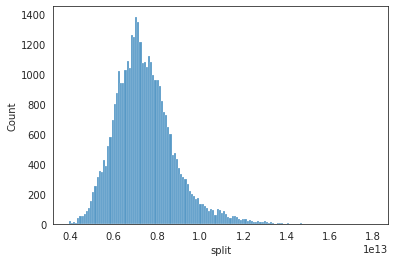

In [ ]:
# Convert the TimeDelta to integer...
# This works, but look at the units
with sns.axes_style('white'):
    g = sns.histplot(df["split"].astype(int)) 

In [ ]:
# TimeDelta uses nanoseconds (ns), so we can create columns that use "seconds"
df['split_sec'] = df['split'].astype(int) / 1E9
df['final_sec'] = df['final'].astype(int) / 1E9

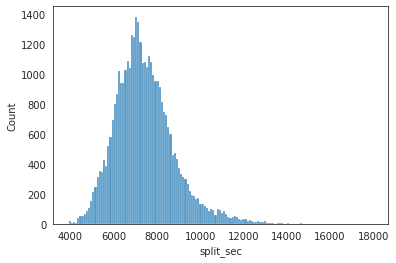

In [ ]:
# This works (split)
with sns.axes_style('white'):
    g = sns.histplot(df["split_sec"].astype(int)) 

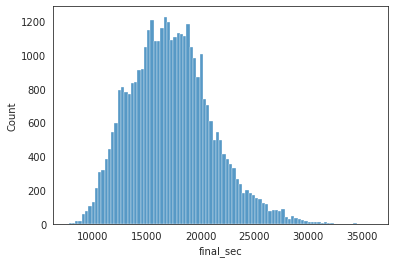

In [ ]:
# Same thing for final time
with sns.axes_style('white'):
    g = sns.histplot(df["final_sec"].astype(int)) 

# Now look for relationships 

Split and final time -- any questions?

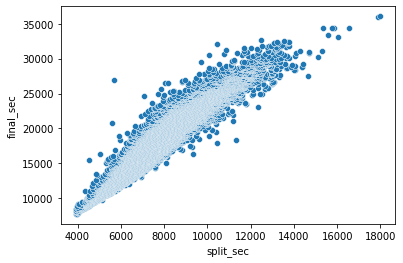

In [ ]:
sns.scatterplot(x="split_sec", y="final_sec", data=df)

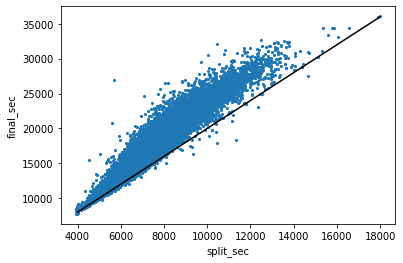

In [ ]:
# Add a line showing 2:1 relationship, tweak the visualization
ax = sns.scatterplot(x="split_sec", y="final_sec", data=df, s=10, linewidth=0)
ax.plot(np.linspace(4000, 18000), np.linspace(8000, 36000), 'k');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


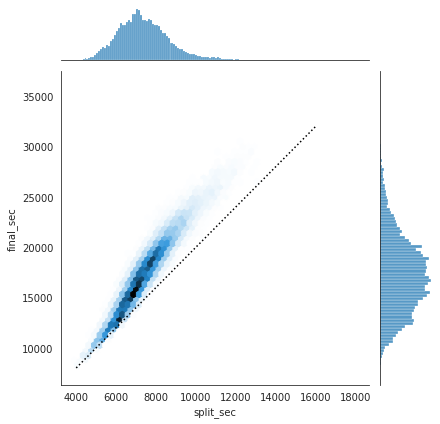

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", df, kind='hex') 
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

# EXERCISE #3

Get rid of the FutureWarning

# Q: What have we learned?

A: For most people, the final time is more than twice the first split.

In other words: most (but not all) runners slow down in the 2nd half of the maraton.

Q (new): Do faster runners tend to have more negative splits?

Next step...use a simple model to look further into this question.


In [ ]:
# Create a new column that measures departure from even split.
df['split_frac'] = 1 - 2 * df['split_sec'] / df['final_sec']
df

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842
...,...,...,...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57,15864.0,34377.0,0.077057
37246,36,M,0 days 04:35:43,0 days 09:33:28,16543.0,34408.0,0.038421
37247,51,M,0 days 04:22:35,0 days 09:33:40,15755.0,34420.0,0.084544
37248,55,W,0 days 04:58:06,0 days 10:00:40,17886.0,36040.0,0.007436


In [ ]:
print("Out of {:,} participants, {} had a negative split.".format(df.shape[0], sum(df.split_frac < 0)))

Out of 37,250 participants, 251 had a negative split.


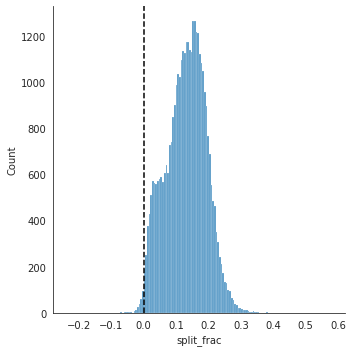

In [ ]:
with sns.axes_style('white'):
  g = sns.displot(df['split_frac'], kde=False) 
  g.ax.axvline(0, color="k", linestyle="--");

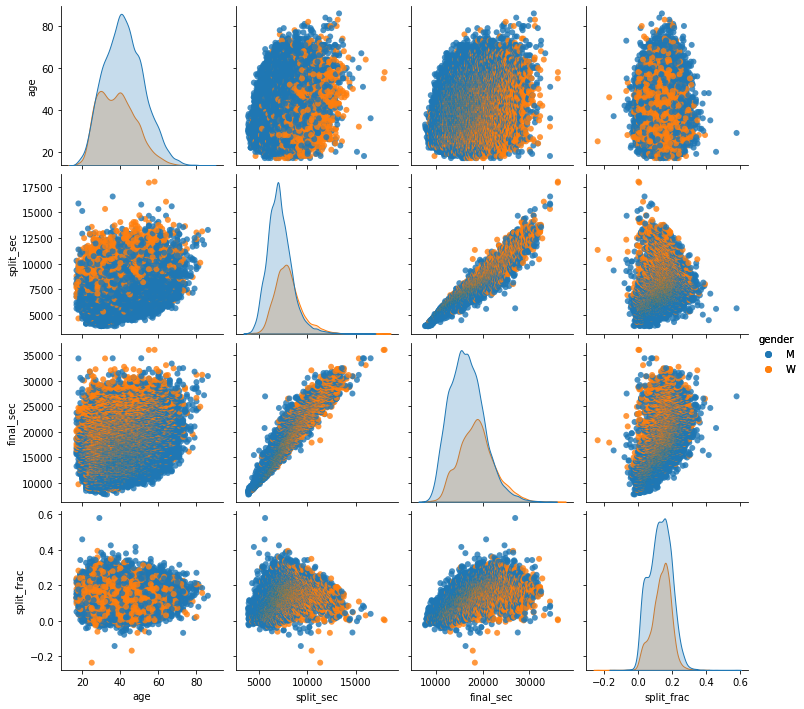

In [ ]:
# Note: this can take over a minute
g = sns.pairplot(df, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', plot_kws=dict(alpha=.8, linewidth=0))
g.add_legend();

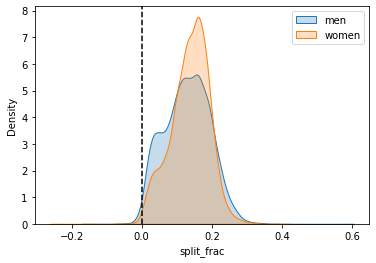

In [ ]:
# We can compare normalized PDF (recall KDE = Kernel Density Estimation)
sns.kdeplot(df.split_frac[df.gender=='M'], label='men', shade=True)
ax = sns.kdeplot(df.split_frac[df.gender=='W'], label='women', shade=True)
ax.legend()
ax.axvline(0, color="k", linestyle="--");

# Q: What have we learned?

Quoting VanderPlas...

"The interesting thing here is that there are many more men than women who are running close to an even split! This almost looks like some kind of bimodal distribution among the men and women."

Let's dig into this a bit more...

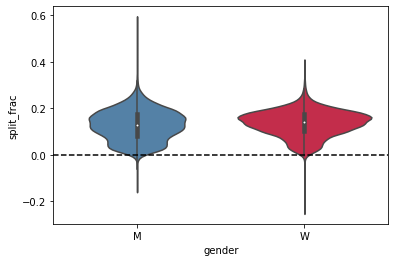

In [ ]:
# Compare gender & split_frac distributions with violin plots
ax = sns.violinplot(x=df["gender"], y=df["split_frac"], palette=["steelblue", "crimson"])
ax.axhline(0, color="k", linestyle="--");

# Q: Age dependency?

In [ ]:
# Create a column of 10-yr age cohorts
df['age_dec'] = df.age.map(lambda age: 10 * (age // 10))
df

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30
...,...,...,...,...,...,...,...,...
37245,18,M,0 days 04:24:24,0 days 09:32:57,15864.0,34377.0,0.077057,10
37246,36,M,0 days 04:35:43,0 days 09:33:28,16543.0,34408.0,0.038421,30
37247,51,M,0 days 04:22:35,0 days 09:33:40,15755.0,34420.0,0.084544,50
37248,55,W,0 days 04:58:06,0 days 10:00:40,17886.0,36040.0,0.007436,50


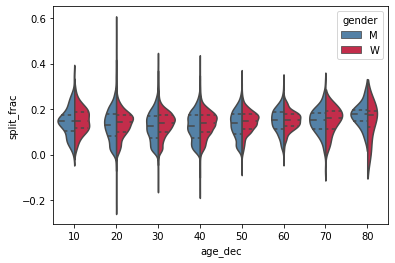

In [ ]:
men = (df.gender == 'M')
women = (df.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", data=df, hue="gender",
                   split=True, inner="quartile",
                   palette=["steelblue", "crimson"], plot_kws=dict(alpha=.8));

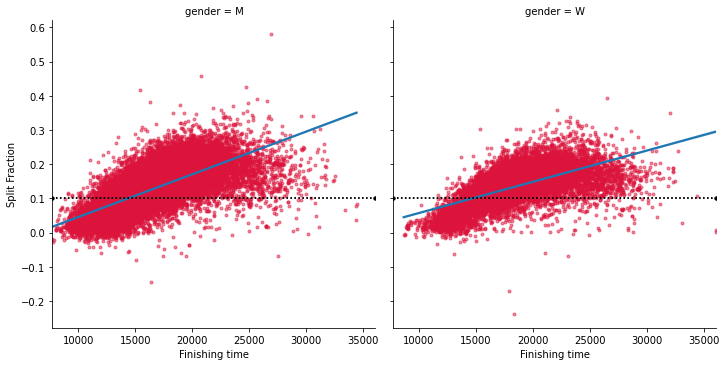

In [ ]:
# Do faster runners have negative splits?
# We'll use Seaborn's lmplot: data and a regression model on a FacetGrid.
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=df,
               markers=".", scatter_kws=dict(color='crimson', alpha=.5))
g.map(g.axes[0,0].axhline, y=0.1, color="k", ls=":");
g.map(g.axes[0,1].axhline, y=0.1, color="k", ls=":");
g.axes[0, 0].set_ylabel("Split Fraction")
g.axes[0, 0].set_xlabel("Finishing time")
g.axes[0, 1].set_xlabel("Finishing time");

# Q: Do faster runners tend to have negative splits?

A: Yup -- and regardless of gender.